## The Role of Analytics in Human Resources

#### Objectives
* Uncorver the factors that contribute to employer attrition rate
* Provide reccommendations on areas to invest to decrease the rate of attrition
* Create a Model to predict the probality of employer leaving the company


#### Data Source
* [Data Source](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

#### About the data

This is a fictional data set created by IBM data scientists.

* Education : 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

* EnvironmentSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

* JobInvolvement :  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

* JobSatisfaction :  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

* PerformanceRating :  1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

* RelationshipSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

* WorkLifeBalance : 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

***
#### Import Packages
***

In [1]:
import pandas as pd # for tabular data manipulation
import numpy as np # for numeric computing
import matplotlib.pyplot as plt # for ploting /visualization
import matplotlib as matplot # visulization
import seaborn as sns # visualization

%matplotlib inline

***
#### Read the data
***

In [2]:
hrdata = pd.read_csv("./data/HR-Employee-Attrition.csv")
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


***
### Data Quality Check
***

In [3]:
## check for missing values from the datasets
hrdata.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

***
**There is no missing values from the dataset. This is because the datasets is a fictional dataset created by the IBM data scientist.**
***

In [4]:
## check for the data detail information
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
## Check for data type inconsistencies
hrdata.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

***
**There is consistency in the data type**


There are 26 numeric columns and 9 discrete columns
***

***
### Exploratory Data Analysis
***

In [6]:
## how many employer in the datasets
hrdata.shape

(1470, 35)

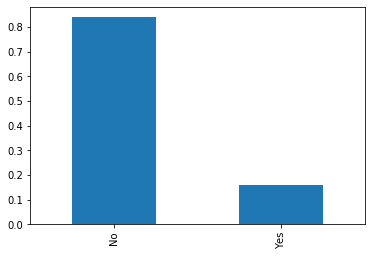

In [7]:
## calculate the attrition rate of the company.
attrition_rate = hrdata.Attrition.value_counts() / hrdata.shape[0]
attrition_rate.plot.bar()

**This is an imbalance datasets. 16% of the employer is classifield has YES in attrition rate while 83% is classifield as NO in the attrition rate.**

We are are dealing with class inbalance

In [8]:
## Summary statistics of the employer
hrdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
## diplay the mean summary of the attrition rate of the company, to observed the group difference
hrdata_summary = hrdata.groupby('Attrition')
hrdata_summary.mean().T

Attrition,No,Yes
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EmployeeCount,1.000000,1.000000
EmployeeNumber,1027.656123,1010.345992
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987
JobLevel,2.145985,1.637131


In [10]:
## check the summary std
hrdata_summary.std().T

Attrition,No,Yes
Age,8.888360,9.689350
DailyRate,403.208379,401.899519
DistanceFromHome,8.012633,8.452525
Education,1.027002,1.008244
EmployeeCount,0.000000,0.000000
EmployeeNumber,606.217074,580.750572
EnvironmentSatisfaction,1.071132,1.169791
HourlyRate,20.380754,20.099958
JobInvolvement,0.692050,0.773405
JobLevel,1.117933,0.940594


In [11]:
## check the columns list
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

***
#### Correlation Matrix
***

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


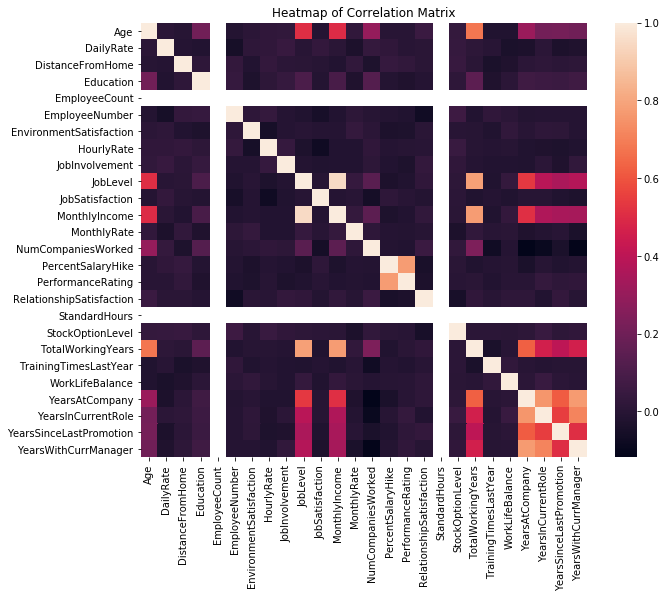

In [12]:
## create a correlation matrix

plt.figure(figsize=(10,8))

cor = hrdata.corr()

sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels= cor.columns.values)
plt.title("Heatmap of Correlation Matrix")
cor

***
#### Drop  columns that are not useful
***

In [13]:
## Drop redundant columns
# 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate' : check if they are correlated
# 'StandardHours' : all values are 80
# 'Over18' : All the employer above 18

col_to_drop = ['EmployeeCount','EmployeeNumber','Over18', 'StandardHours']

In [14]:
hrdata.drop(['EmployeeCount','EmployeeNumber','Over18', 'StandardHours'], axis=1, inplace=True)

hrdata.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

***
#### Repeat the correlation matrix
***

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


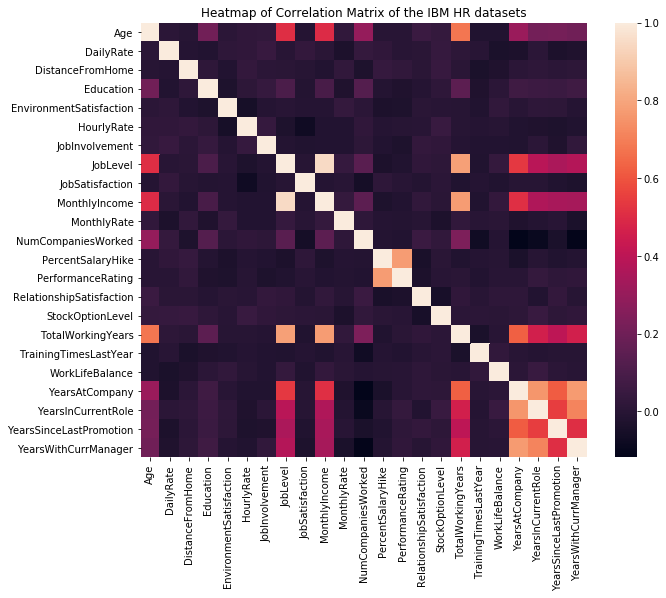

In [15]:
plt.figure(figsize=(10,8))
corr = hrdata.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)
plt.title("Heatmap of Correlation Matrix of the IBM HR datasets")
corr

***
#### Change Attrition value to 0 : NO, 1 :YES

This will allow us to view the correlation between Attrition and other variableS
***

In [16]:
hrdata['Attrition'] = hrdata.Attrition.map(dict(Yes=1, No=0))
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


***
#### Correlation Matrix 3
***

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


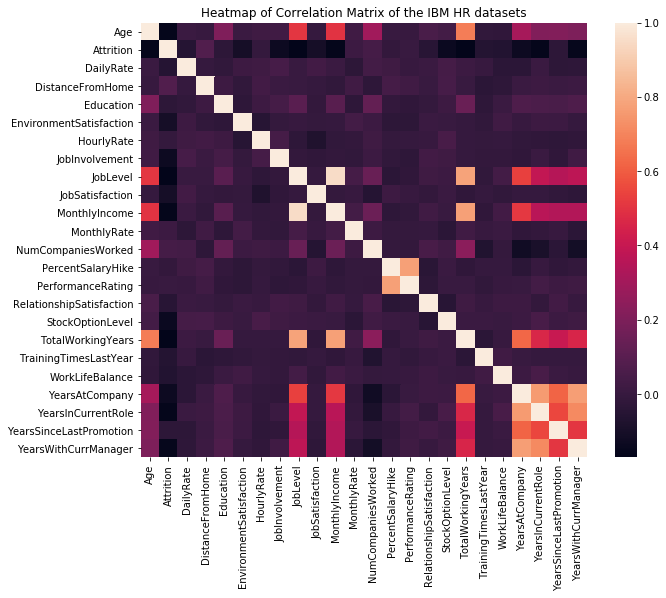

In [17]:
plt.figure(figsize=(10,8))
corr = hrdata.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)
plt.title("Heatmap of Correlation Matrix of the IBM HR datasets")
corr

***
#### Distribution of Age, MonthlyIncome, JobSatisfaction
***

Text(0, 0.5, 'Employee Count')

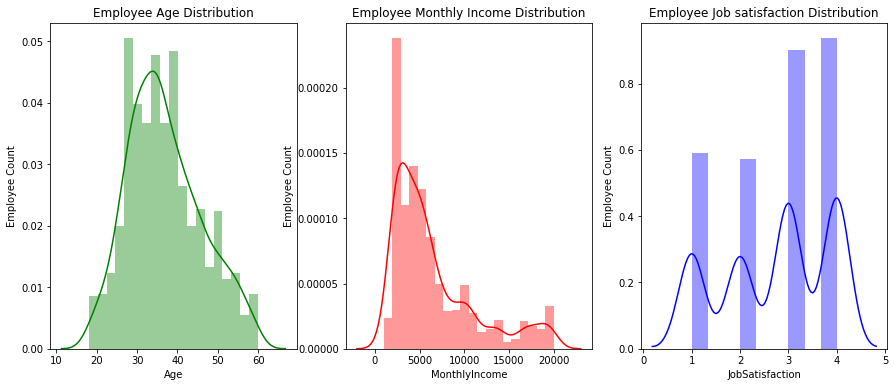

In [18]:

fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Age graph
sns.distplot(hrdata.Age, kde=True, color="g", ax=axes[0]).set_title('Employee Age Distribution')
axes[0].set_ylabel('Employee Count')

# MonthlyIncome graph
sns.distplot(hrdata.MonthlyIncome, kde=True, color='r', ax=axes[1]).set_title('Employee Monthly Income Distribution')
axes[1].set_ylabel('Employee Count')

# JobSatisfaction graph
sns.distplot(hrdata.JobSatisfaction, kde=True, color='b', ax=axes[2]).set_title('Employee Job satisfaction Distribution')
axes[2].set_ylabel('Employee Count')


***
#### Distribution of DailyRate, Education and DistanceFromeHome
***

Text(0, 0.5, 'Employee Count')

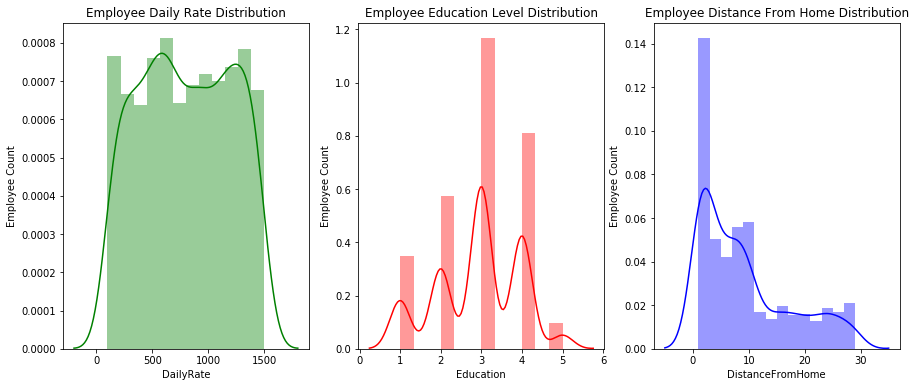

In [19]:
## plot the distribution of DailyRate, Education and DiatanceFromeHome

# setup matplotlib figure

fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

# DailyRate graph
sns.distplot(hrdata.DailyRate, kde=True, color="g", ax=axes[0]).set_title('Employee Daily Rate Distribution')
axes[0].set_ylabel('Employee Count')

# Education graph
sns.distplot(hrdata.Education, kde=True, color='r', ax=axes[1]).set_title('Employee Education Level Distribution')
axes[1].set_ylabel('Employee Count')

# Distance From Home graph
sns.distplot(hrdata.DistanceFromHome, kde=True, color='b', ax=axes[2]).set_title('Employee Distance From Home Distribution')
axes[2].set_ylabel('Employee Count')

***
#### Age and Monthly Income
***

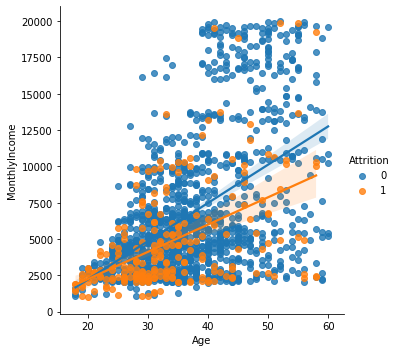

In [20]:
sns.lmplot(x='Age', y='MonthlyIncome', data=hrdata,fit_reg=True,hue='Attrition') 

***
* Employee with low monthly income and withing the Age of 18 to 35 are more likely to leave the company
***

***
#### Monthly Income and Job satisfaction
***

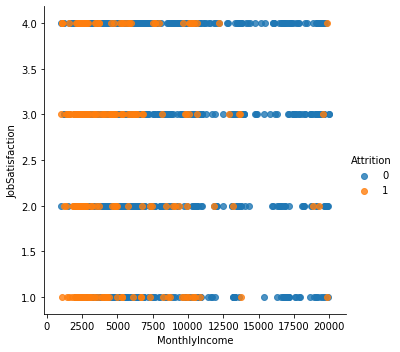

In [21]:
sns.lmplot(x='MonthlyIncome', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

***
* Employee with low monthly income inrespective of job Satisfaction are likely to leave the company
***

***
#### Job satisfaction and distance from home

Is the diatance a factor of job satisfation?
***

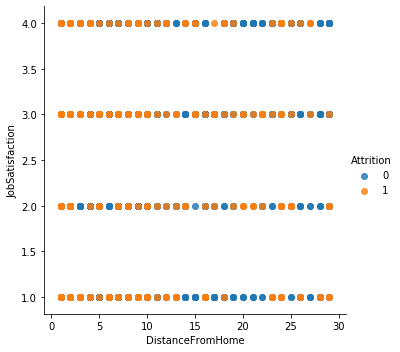

In [22]:
sns.lmplot(x='DistanceFromHome', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

***
#### Age and Distance from home
***

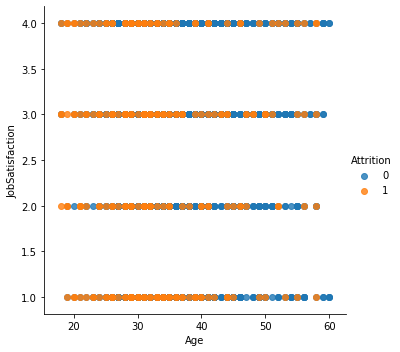

In [23]:
sns.lmplot(x='Age', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

***
#### Performance rating and Job satisfaction
***

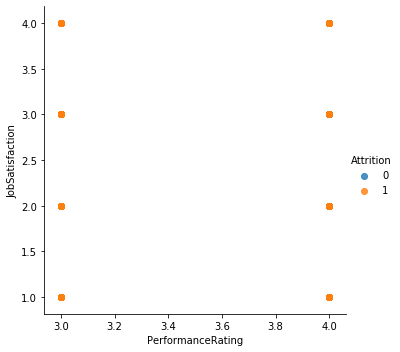

In [24]:
sns.lmplot(x='PerformanceRating', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

***
#### Employee JobSatisfaction
***

Text(0.5, 1.0, 'Employee Job Satisfaction Distribution - Attrition V.S. No Attrition')

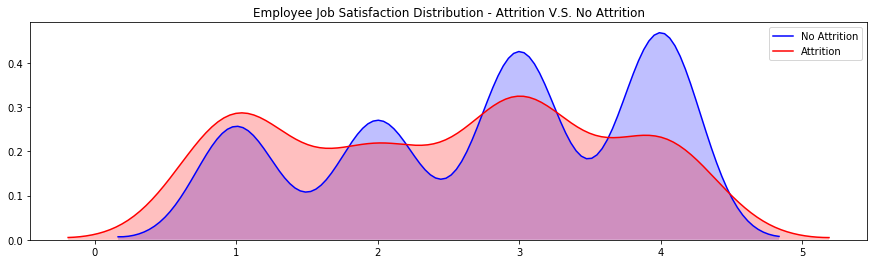

In [25]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'JobSatisfaction'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'JobSatisfaction'] , color='r',shade=True, label='Attrition')
plt.title('Employee Job Satisfaction Distribution - Attrition V.S. No Attrition')

***
* Employee with lower job satisfation are likely to leave compared to employee with higher job satisfation
***

***
#### Employee Age
***

Text(0.5, 1.0, 'Employee Age Distribution - Attrition V.S. No Attrition')

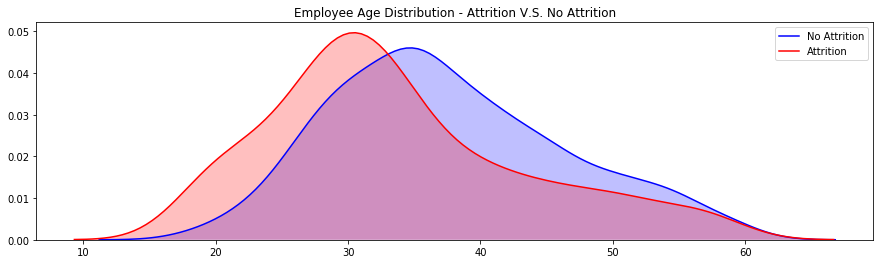

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'Age'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'Age'] , color='r',shade=True, label='Attrition')
plt.title('Employee Age Distribution - Attrition V.S. No Attrition')

***
#### Monthly Income
***

Text(0.5, 1.0, 'Employee Monthly Income Distribution - Attrition V.S. No Attrition')

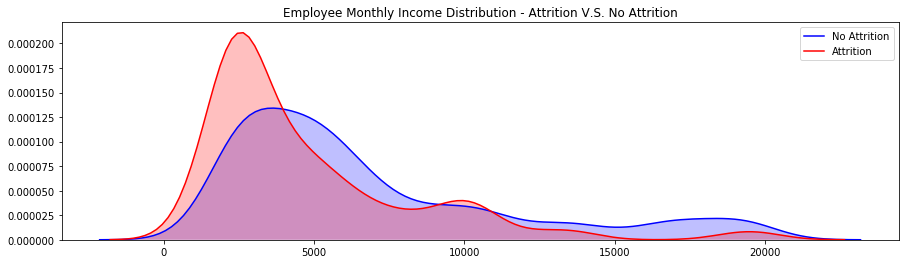

In [27]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'MonthlyIncome'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'MonthlyIncome'] , color='r',shade=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')

***
* Employee with low Monthly Income are likely to leave the company
***

***
#### Employee Monthly Income Distribution based on Overtime
***

[Text(0, 0.5, 'Percent')]

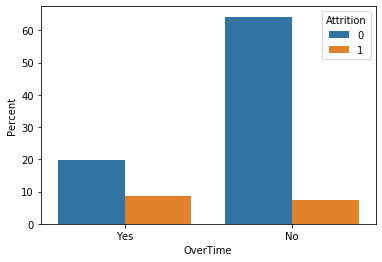

In [28]:
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=hrdata, estimator=lambda x: len(x) / len(hrdata) * 100)
ax.set(ylabel="Percent")

***
#### Department Distribution
***

In [29]:
hrleft = hrdata[hrdata['Attrition']==1]

hrleft = pd.DataFrame(hrleft.Department.value_counts()).reset_index()
hrstay = pd.DataFrame(hrdata.Department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"Department_x":'left', "Department_y":'stay', "index":'Department' })
hr_merge

,Department,left,stay
0,Research & Development,133,961
1,Sales,92,446
2,Human Resources,12,63


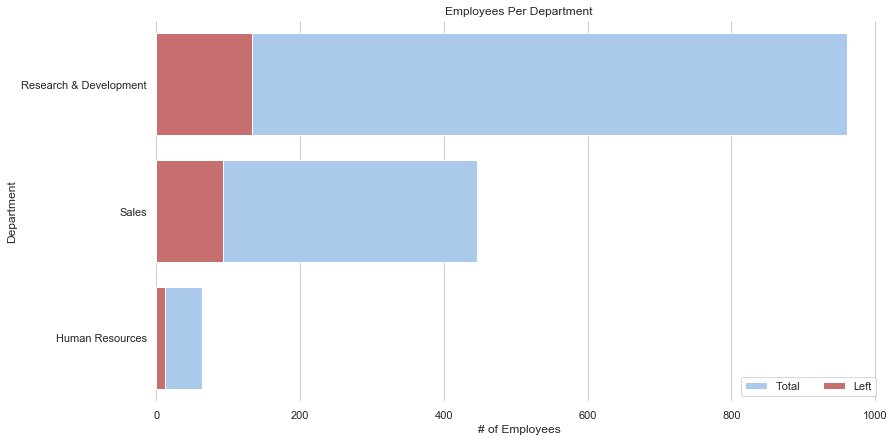

In [30]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='Department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="Department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

***
### KMean Clustering of the Employee Attrition
***

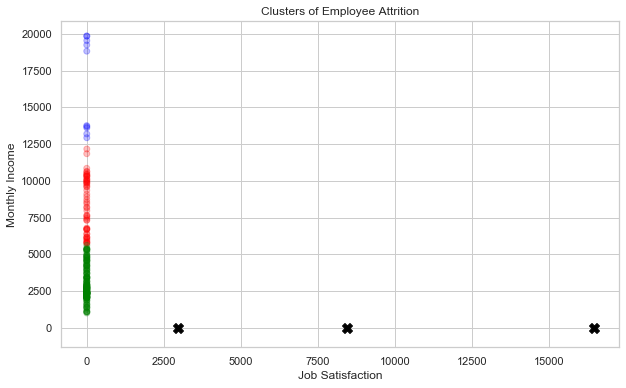

In [31]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(hrdata[hrdata.Attrition==1][["MonthlyIncome","JobSatisfaction"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="JobSatisfaction",y="MonthlyIncome", data=hrdata[hrdata.Attrition==1],alpha=0.25,color = kmeans_colors)
plt.xlabel("Job Satisfaction")
plt.ylabel("Monthly Income")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Attrition")
plt.show()

***
### Data Pre-Processing
* Seperate Categrical and numeric variable, apply get_dummies() to categorical variable, then combined.
***

In [32]:
hrdata.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [33]:
cat_variables = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
num_variables = ['Age', 'Attrition', 'DailyRate','DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate',
                 'JobInvolvement','JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 
                 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']


categorical_df = pd.get_dummies(hrdata[cat_variables], drop_first=True)
numerical_df = hrdata[num_variables]


new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,3,4,1,6,3,3,2,2,2,2


#### Class Imbalance

In [34]:
new_df.Attrition.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

***
**Employee Attrition Rate is 16%**
***

Text(0, 0.5, 'Count')

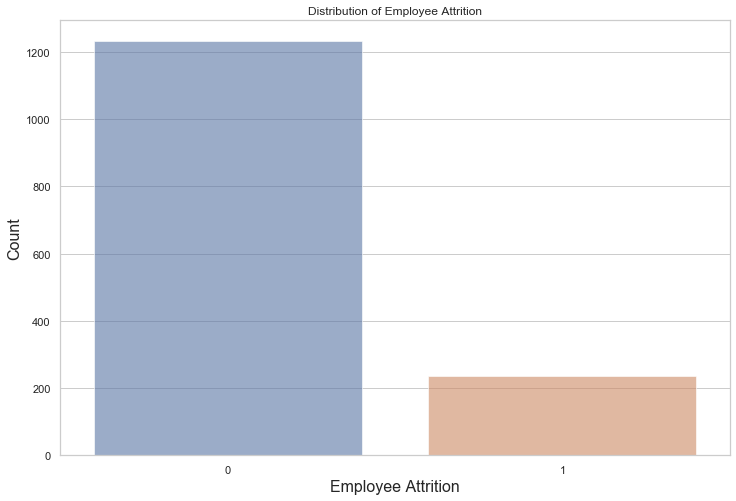

In [35]:
plt.figure(figsize=(12,8))
Attrition = new_df.Attrition.value_counts()
sns.barplot(y=Attrition.values, x=Attrition.index, alpha=0.6)
plt.title('Distribution of Employee Attrition')
plt.xlabel('Employee Attrition', fontsize=16)
plt.ylabel('Count', fontsize=16)

***
There are many ways of dealing with imbalanced data. We will focus in the following approaches:

1. Oversampling — SMOTE
1. Undersampling — RandomUnderSampler

***

***
#### Let's train a base logistic regression model on the three types of samples to see which yields the best result:

* Orginal Sample
* Upsampling Data
***

***
### Split Dataset into Train and Test set
***

In [36]:
new_df.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingY

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

X_cols = ['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

y_col = ['Attrition']

# Create the X and y set
X = new_df[X_cols]
y = new_df[y_col]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [38]:
print("The shape of X_train: {}".format(X_train.shape))
print("The shape of y_train: {}".format(y_train.shape))
print("The shape of X_test: {}".format(X_test.shape))
print("The shape of y_test: {}".format(X_train.shape))

The shape of X_train: (1176, 44)
The shape of y_train: (1176, 1)
The shape of X_test: (294, 44)
The shape of y_test: (1176, 44)


***
### Resampling
***

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 


# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, np.ravel(y_train, order='C'))



print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)


Original shape: (1176, 44) (1176, 1)
SMOTE sample shape: (1972, 44) (1972,)


#### Base line Logistic Regression for sample Selection

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "SMOTE":(x_train_sm,y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

The best F1 Score for Original data:
0.02051282051282051


C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

The best F1 Score for SMOTE data:
0.7080648778467554


C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

0.3835076235251147

* Original Data (class imbalance) : F1 score = 0.5
* Smooth data (balance Class) : F1 score = 0.8


### Modeling

#### Logistic Regression

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))

C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




 ---Logistic Regression Model---
Logistic Regression AUC = 0.59
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       247
           1       0.22      0.53      0.31        47

    accuracy                           0.63       294
   macro avg       0.55      0.59      0.53       294
weighted avg       0.77      0.63      0.67       294



C:\Users\teeja\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')

rf_result.mean()

0.8829493933992033

In [44]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.62
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.59      0.28      0.38        47

    accuracy                           0.85       294
   macro avg       0.73      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294



#### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier()

In [46]:
## 5 fold cross validation
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.8166222018651711

In [47]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.65
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.57      0.36      0.44        47

    accuracy                           0.85       294
   macro avg       0.73      0.65      0.68       294
weighted avg       0.84      0.85      0.84       294



### ROC Graph

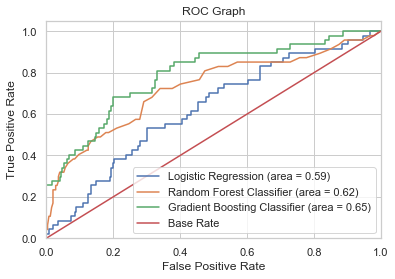

In [48]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

### Feature Importance

In [49]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,StockOptionLevel,0.063806
1,JobInvolvement,0.059914
2,JobSatisfaction,0.050951
3,MonthlyIncome,0.046096
4,EnvironmentSatisfaction,0.043649
5,YearsAtCompany,0.040317
6,TotalWorkingYears,0.039259
7,MonthlyRate,0.037338
8,YearsInCurrentRole,0.035976
9,JobLevel,0.035402


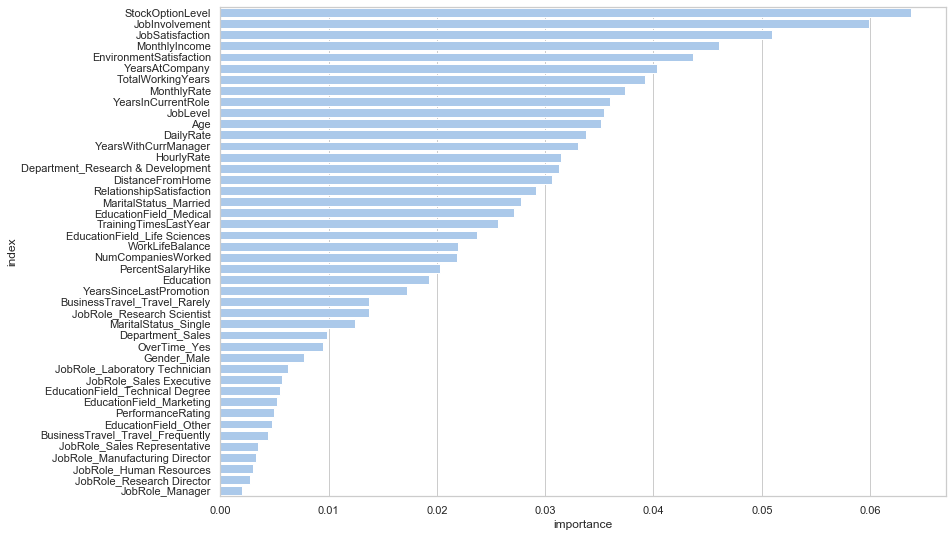

In [50]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

#### Apply Random Noise to feature Importance

In [51]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])


# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()
feature_importances_random



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,index,importance
0,MonthlyIncome,0.068249
1,TotalWorkingYears,0.055175
2,DailyRate,0.052084
3,Age,0.050917
4,MonthlyRate,0.048805
5,RANDOM_NOISE,0.047486
6,OverTime_Yes,0.046186
7,HourlyRate,0.044141
8,YearsAtCompany,0.041089
9,DistanceFromHome,0.039296


#### Viz Feature Importance

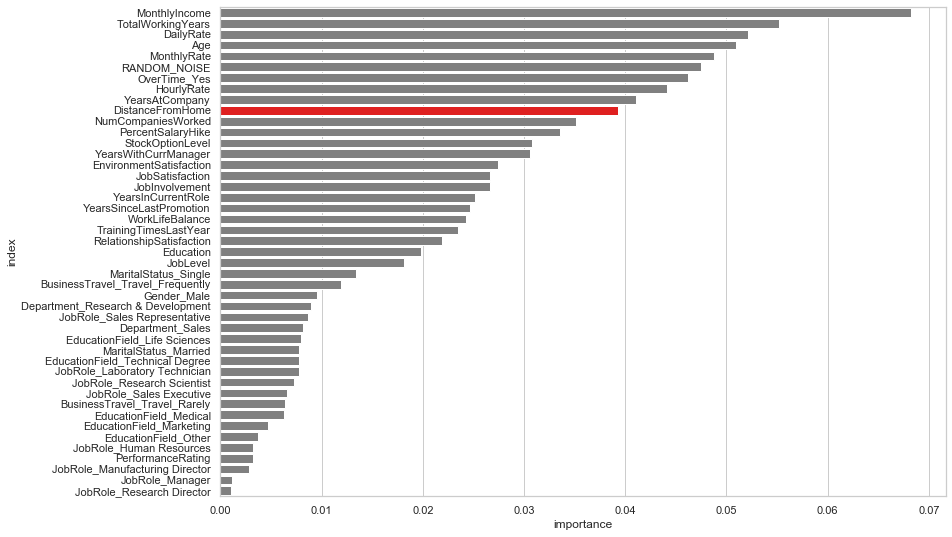

In [52]:

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))


clrs = ['red' if (x == 9 ) else 'grey' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

### Random Forest Using Feature Importance

In [53]:
col_imp = ['Attrition','Age','OverTime','HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','DistanceFromHome']


In [54]:
x_train_sm.shape

(1972, 44)

#### Select the feature importance columns

In [55]:
hrdata_imp = hrdata[col_imp ]
hrdata_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Attrition           1470 non-null   int64 
 1   Age                 1470 non-null   int64 
 2   OverTime            1470 non-null   object
 3   HourlyRate          1470 non-null   int64 
 4   DailyRate           1470 non-null   int64 
 5   MonthlyIncome       1470 non-null   int64 
 6   TotalWorkingYears   1470 non-null   int64 
 7   YearsAtCompany      1470 non-null   int64 
 8   NumCompaniesWorked  1470 non-null   int64 
 9   DistanceFromHome    1470 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 115.0+ KB


#### Correlation Matrix of the selected Columns

,Attrition,Age,HourlyRate,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,DistanceFromHome
Attrition,1.000000,-0.159205,-0.006846,-0.056652,-0.159840,-0.171063,-0.134392,0.043494,0.077924
Age,-0.159205,1.000000,0.024287,0.010661,0.497855,0.680381,0.311309,0.299635,-0.001686
HourlyRate,-0.006846,0.024287,1.000000,0.023381,-0.015794,-0.002334,-0.019582,0.022157,0.031131
DailyRate,-0.056652,0.010661,0.023381,1.000000,0.007707,0.014515,-0.034055,0.038153,-0.004985
MonthlyIncome,-0.159840,0.497855,-0.015794,0.007707,1.000000,0.772893,0.514285,0.149515,-0.017014
TotalWorkingYears,-0.171063,0.680381,-0.002334,0.014515,0.772893,1.000000,0.628133,0.237639,0.004628
YearsAtCompany,-0.134392,0.311309,-0.019582,-0.034055,0.514285,0.628133,1.000000,-0.118421,0.009508
NumCompaniesWorked,0.043494,0.299635,0.022157,0.038153,0.149515,0.237639,-0.118421,1.000000,-0.029251
DistanceFromHome,0.077924,-0.001686,0.031131,-0.004985,-0.017014,0.004628,0.009508,-0.029251,1.000000


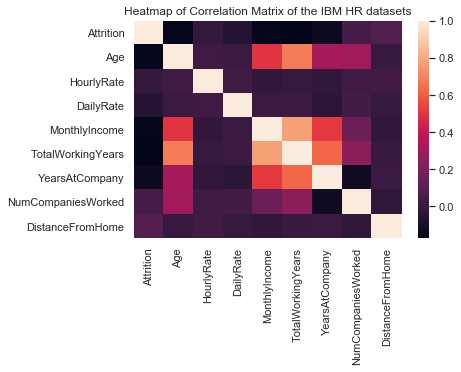

In [56]:
## corelation matrix
corr = hrdata_imp.corr()

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)
plt.title("Heatmap of Correlation Matrix of the IBM HR datasets")
corr


#### Data Pre-processing

In [57]:
hrdata_imp.dtypes

Attrition              int64
Age                    int64
OverTime              object
HourlyRate             int64
DailyRate              int64
MonthlyIncome          int64
TotalWorkingYears      int64
YearsAtCompany         int64
NumCompaniesWorked     int64
DistanceFromHome       int64
dtype: object

In [58]:
cat_df = pd.get_dummies(hrdata_imp[['OverTime']], drop_first=True)
num_df = hrdata_imp[['Attrition','Age','HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','DistanceFromHome']]


new_df_imp = pd.concat([num_df,cat_df], axis=1)
new_df_imp.head()

,Attrition,Age,HourlyRate,DailyRate,MonthlyIncome,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,DistanceFromHome,OverTime_Yes
0,1,41,94,1102,5993,8,6,8,1,1
1,0,49,61,279,5130,10,10,1,8,0
2,1,37,92,1373,2090,7,0,6,2,1
3,0,33,56,1392,2909,8,8,1,3,1
4,0,27,40,591,3468,6,2,9,2,0


#### Split Train/Test

In [59]:
new_df_imp.columns

Index(['Attrition', 'Age', 'HourlyRate', 'DailyRate', 'MonthlyIncome',
       'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked',
       'DistanceFromHome', 'OverTime_Yes'],
      dtype='object')

In [60]:
x_cols = [ 'Age', 'HourlyRate', 'DailyRate', 'MonthlyIncome','TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked','DistanceFromHome', 'OverTime_Yes']
y_col = ['Attrition']

# Create the X and y set
X = new_df_imp[x_cols]
y = new_df_imp[y_col]

# Define train and test
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

In [61]:
print("X_train_imp shape : {}".format(X_train_imp.shape))
print("y_train_imp shape : {}".format(y_train_imp.shape))
print("X_test_imp shape : {}".format(X_test_imp.shape))
print("y_test_imp shape : {}".format(y_test_imp.shape))

X_train_imp shape : (1176, 9)
y_train_imp shape : (1176, 1)
X_test_imp shape : (294, 9)
y_test_imp shape : (294, 1)


#### Resampling

In [63]:
# Upsample using SMOTE
sm = SMOTE(random_state=12)
X_train_imp_sm, y_train_imp_sm = sm.fit_sample(X_train_imp,np.ravel(y_train_imp, order='C'))



print("Original shape:", X_train_imp.shape, y_train_imp.shape)
print ("SMOTE sample shape:", X_train_imp_sm.shape, y_train_imp_sm.shape)

Original shape: (1176, 9) (1176, 1)
SMOTE sample shape: (1972, 9) (1972,)


***
### Random Forest
***

In [64]:
# Random Forest Model
model = RandomForestClassifier()

rf_result = cross_val_score(model, X_train_imp_sm, y_train_imp_sm, cv=5, scoring='f1')

rf_result.mean()

0.8607292399007177

In [65]:
X_train_imp_sm_df = pd.DataFrame(X_train_imp_sm)


# Fit Random Forest to DataSet
model = RandomForestClassifier()
model_rf = model.fit(X_train_imp_sm_df, y_train_imp_sm)


# Get Feature Importances
feature = pd.DataFrame(model_rf.feature_importances_, index = X_train_imp_sm_df.columns,columns=['importance']).sort_values('importance', ascending=False)
feature = feature.reset_index()
feature


,index,importance
0,MonthlyIncome,0.181915
1,DailyRate,0.149468
2,YearsAtCompany,0.122780
3,Age,0.121806
4,HourlyRate,0.120830
5,TotalWorkingYears,0.106912
6,DistanceFromHome,0.100162
7,NumCompaniesWorked,0.069163
8,OverTime_Yes,0.026964


***
#### Test the model
***

In [66]:
prediction = model_rf.predict(X_test_imp)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
print ("\n\n ---Random Forest Model---")
rfm_auc = roc_auc_score(y_test_imp,prediction )

print ("Random Forest Classifier AUC = %2.2f" % rfm_auc)
print(classification_report(y_test_imp, prediction))



 ---Random Forest Model---
Random Forest Classifier AUC = 0.65
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       247
           1       0.38      0.45      0.41        47

    accuracy                           0.80       294
   macro avg       0.64      0.65      0.64       294
weighted avg       0.81      0.80      0.80       294



In [68]:
model_rf.predict_proba(X_test_imp)[:30]

array([[0.56, 0.44],
       [0.59, 0.41],
       [0.88, 0.12],
       [0.68, 0.32],
       [0.74, 0.26],
       [0.76, 0.24],
       [0.54, 0.46],
       [0.59, 0.41],
       [0.64, 0.36],
       [0.94, 0.06],
       [0.87, 0.13],
       [0.25, 0.75],
       [0.55, 0.45],
       [0.47, 0.53],
       [0.45, 0.55],
       [0.83, 0.17],
       [0.75, 0.25],
       [0.6 , 0.4 ],
       [0.54, 0.46],
       [0.91, 0.09],
       [0.12, 0.88],
       [0.61, 0.39],
       [0.62, 0.38],
       [0.88, 0.12],
       [0.29, 0.71],
       [0.7 , 0.3 ],
       [0.32, 0.68],
       [0.81, 0.19],
       [0.85, 0.15],
       [0.85, 0.15]])

#### save the model

In [69]:
import pickle

# save the model to disk
filename = 'random_forest_hr_model.sav'
pickle.dump(model_rf, open(filename, 'wb'))


# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

In [71]:

def prep_data(df):
    '''
    :Assumption: Asuuming the dataframe contains the required columns
    : required columns : ['OverTime','Age','HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','DistanceFromHome']
    :input: pandas dataframe
    :output: pre-processed dataframe  with selected columns
    '''
    try :
        cat_df = pd.get_dummies(df[['OverTime']], drop_first=True)
        num_df = df[['Age','HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','DistanceFromHome']]
        new_df = pd.concat([num_df,cat_df], axis=1)
        return new_df
    except Exception as e:
        cols = ['OverTime','Age','HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears','YearsAtCompany','NumCompaniesWorked','DistanceFromHome']
        print("\nn___Required Columns Not in Dataframe__\n\n")
        print(cols)
        print(str(e))
        print("\n\n__ The function returns None__")
        return None

In [72]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

new_prediction = loaded_model.predict(prep_data(hrdata))

In [73]:
print ("\n\n ---Random Forest Model---")
rfm_auc = roc_auc_score(hrdata['Attrition'],new_prediction )

print ("Random Forest Classifier AUC = %2.2f" % rfm_auc)
print(classification_report(hrdata['Attrition'], new_prediction))



 ---Random Forest Model---
Random Forest Classifier AUC = 0.93
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1233
           1       0.86      0.89      0.88       237

    accuracy                           0.96      1470
   macro avg       0.92      0.93      0.93      1470
weighted avg       0.96      0.96      0.96      1470



In [74]:
temp = hrdata[['HourlyRate','DailyRate','MonthlyIncome','TotalWorkingYears']]

x_temp = prep_data(temp)


n___Required Columns Not in Dataframe__


['OverTime', 'Age', 'HourlyRate', 'DailyRate', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked', 'DistanceFromHome']
"None of [Index(['OverTime'], dtype='object')] are in the [columns]"


__ The function returns None__


In [75]:
 prob = loaded_model.predict_proba(prep_data(hrdata))
 prob[:10]
    
    

array([[0.18, 0.82],
       [0.94, 0.06],
       [0.14, 0.86],
       [0.85, 0.15],
       [0.5 , 0.5 ],
       [0.83, 0.17],
       [0.9 , 0.1 ],
       [0.73, 0.27],
       [0.89, 0.11],
       [0.96, 0.04]])

In [76]:
len(prob)

1470

In [77]:
for el in prob[:10]:
    print("The probability of Employee Attrition is : {} %".format(el[0] * 100) )

The probability of Employee Attrition is : 18.0 %
The probability of Employee Attrition is : 94.0 %
The probability of Employee Attrition is : 14.000000000000002 %
The probability of Employee Attrition is : 85.0 %
The probability of Employee Attrition is : 50.0 %
The probability of Employee Attrition is : 83.0 %
The probability of Employee Attrition is : 90.0 %
The probability of Employee Attrition is : 73.0 %
The probability of Employee Attrition is : 89.0 %
The probability of Employee Attrition is : 96.0 %
